In [47]:
from IPython.display import display, Math, Latex
from pyquil.latex import to_latex, display
from pyquil import get_qc, Program
from pyquil.gates import *
from pyquil.api import local_forest_runtime
bit = '011'

In [48]:
def complement(circuit,bit):
    truth = [bool(int(i)) for i in list(bit[::1])]
    for count,i in enumerate(truth):
        if(not i):
            circuit += X(count)


In [49]:
prog = Program()

for i in range(3): prog+=H(i)

complement(prog, bit)        
prog += Z(2).controlled(1).controlled(0)
complement(prog, bit)

for i in range(3): prog+=H(i)
for i in range(3): prog+=X(i)

# Easy controlled status
prog += Z(2).controlled(1).controlled(0)

for i in range(3): prog+=X(i)
for i in range(3): prog+=H(i)

Latex(to_latex(prog))


<IPython.core.display.Latex object>

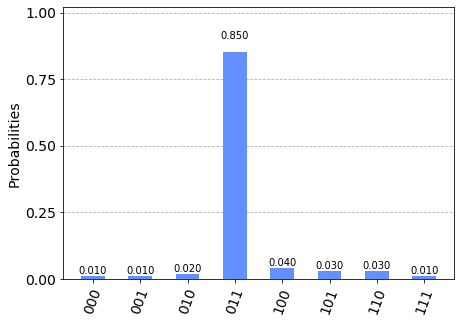

In [50]:
from collections import Counter
from qiskit.visualization import plot_histogram

qc = get_qc('9q-square-qvm')
result = qc.run_and_measure(prog, trials=100)

results = [str(x)+str(y)+str(z) for x,y,z in zip(result[0], result[1], result[2])]
counts = dict(Counter(results))

plot_histogram(counts)


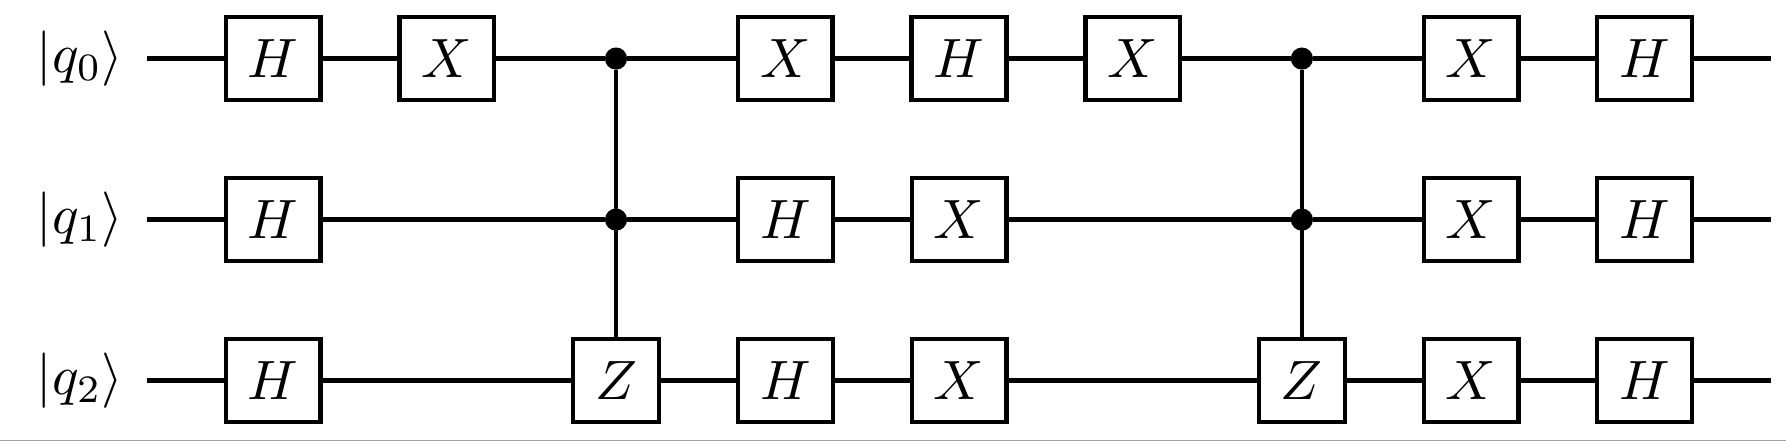

# Using Grove to load Grover's algorithm

In [51]:
from grove.amplification.grover import Grover

# build oracle
o = Program()

complement(o, bit)        
o += Z(2).controlled(1).controlled(0)
complement(o, bit)


In [52]:
grover = Grover().oracle_grover(o, [0,1,2],1)

In [53]:
Latex(to_latex(grover))

<IPython.core.display.Latex object>

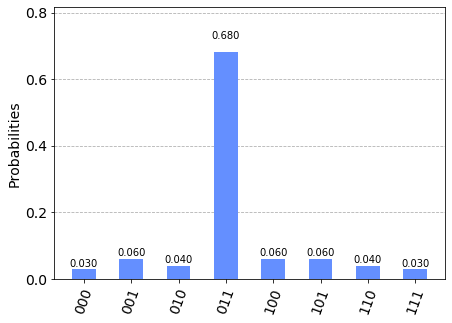

In [54]:
from collections import Counter
from qiskit.visualization import plot_histogram

qc = get_qc('9q-square-qvm')
result = qc.run_and_measure(grover, trials=100)

results = [str(x)+str(y)+str(z) for x,y,z in zip(result[0], result[1], result[2])]
counts = dict(Counter(results))

plot_histogram(counts)


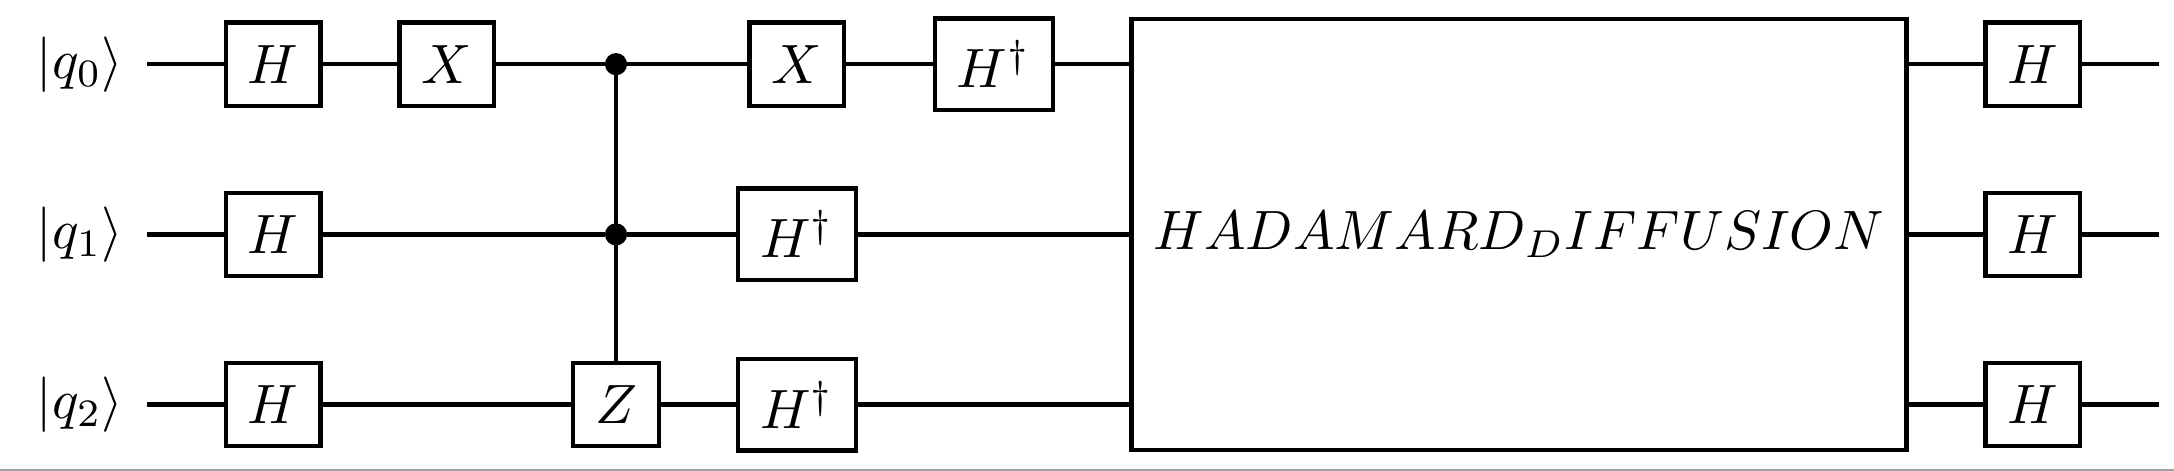